# task 1:

In [54]:
with open('weight-height.csv','r') as file:
    data=file.readlines()
    
columnsName=data.pop(0)

'''
first row is colunms name and we add it in another time
'''

def BinarySex(arr:list)->list:

    for i,element in enumerate(arr):
        element=element.split(',')
        first_element=element[0].replace('"','')
        
        if first_element=='Male':
            element[0]='0'
            
        elif first_element=='Female':
            element[0]='1'
            
        arr[i]=','.join(element)
    return arr

data=BinarySex(data)
data[:5]

['0,73.847017017515,241.893563180437\n',
 '0,68.7819040458903,162.310472521300\n',
 '0,74.1101053917849,212.7408555565\n',
 '0,71.7309784033377,220.042470303077\n',
 '0,69.8817958611153,206.349800623871\n']

# task 2:

In [73]:
import pandas as pd

df=pd.read_csv('weight-height.csv')
'''
data have some issue and we change the columns name to true thing
'''
df.columns=['Gender','weight','Height']

df['Gender']=df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
print('AFTER CHANGE :')
df.sample(5)

AFTER CHANGE :


,Gender,weight,Height
2052,0,69.212777,188.947625
1372,0,65.343203,155.729380
5258,1,64.676879,131.182148
2988,0,67.616383,165.955953
5307,1,60.911771,131.710813


# task 3:

<BarContainer object of 2 artists>

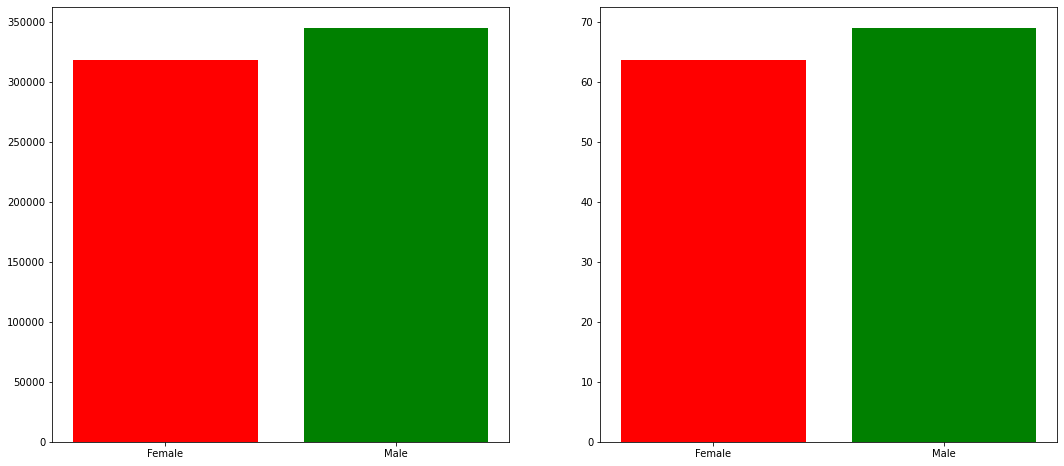

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('weight-height.csv')
'''
data have some issue and we change the columns name to true thing
'''
df.columns=['Gender','weight','Height']

Sum=df.groupby('Gender').sum()['weight']
avg=df.groupby('Gender').mean()['weight']

fig,axs=plt.subplots(1,2,figsize=(18,8))
axs[0].bar(Sum.index,Sum,color=['red','green'])

axs[1].bar(avg.index,avg,color=['red','green'])

# task 4:

In [90]:
import pandas as pd
from seaborn import load_dataset
df=load_dataset('tips')
df.head()
df.groupby('sex').sum()['total_bill']

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

# task 5:

In [92]:
import pandas as pd
from seaborn import load_dataset
df=load_dataset('tips')

def GroupBy_meals(data:pd.DataFrame , meals_column_name:str , target_column:str):
    return data.groupby(meals_column_name).sum()[target_column]
GroupBy_meals(df,'time','total_bill')

time
Lunch     1167.47
Dinner    3660.30
Name: total_bill, dtype: float64

# task 6 :

In [116]:
import pandas as pd
from seaborn import load_dataset
df=load_dataset('tips')

df['smoker']=df['smoker'].apply(lambda x: 0 if x == 'No' else 1).astype(int)

(df.groupby('day').mean()['smoker']*100).round().astype(str)+'%'

day
Thur    27.0%
Fri     79.0%
Sat     48.0%
Sun     25.0%
Name: smoker, dtype: object

# task 7:

In [122]:
import pandas as pd
from seaborn import load_dataset
df=load_dataset('tips')

df['smoker']=df['smoker'].apply(lambda x: 0 if x == 'No' else 1).astype(str)
df['sex']=df['sex'].apply(lambda x: 0 if x == 'Male' else 1).astype(int)

'''
encrypting : 00: male who is not smoker,
            11: female who is smoker ,
            10: femmale who is not smoker,
            01: male who is smoker
'''
def compute(data:pd.DataFrame):
    results={'00':0,'01':0,'10':0,'11':0}
    for i in range(len(data)):
        sex=str(data.iloc[i]['sex'])
        smoke=str(data.iloc[i]['smoker'])
        total=sex+smoke
        results[total]+=data.iloc[i]['total_bill']
    return results
print(compute(df))

{'00': 1919.7499999999998, '01': 1337.0700000000002, '10': 977.6799999999998, '11': 593.27}
